# IMPORT

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='../input/nanum34/NanumSquareR.ttf')
warnings.filterwarnings('ignore')

# 유동인구 데이터 로드

In [138]:
time_df_list = []
age_df_list = []
for x in [201902,201903,201904,201905,202002,202003,202004,202005]:
    time_df_list.append('../input/bigcontest-data/data/01_유동인구데이터(SK텔레콤)/4_FLOW_TIME_'+str(x)+'.CSV')
    age_df_list.append('../input/bigcontest-data/data/01_유동인구데이터(SK텔레콤)/4_FLOW_AGE_'+str(x)+'.CSV')
time_df = pd.concat([pd.read_csv(path,sep='|') for path in time_df_list])
age_df = pd.concat([pd.read_csv(path,sep='|') for path in age_df_list])     

In [139]:
time_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201902,20190201,1114052000,소공동,1496.35,1022.83,706.51,547.77,1673.02,3561.05,...,12355.91,13096.69,9317.64,15029.74,14135.83,9074.02,6032.26,6047.05,4806.65,2956.11
1,201902,20190201,1114054000,회현동,1692.37,1117.26,839.57,653.41,1920.52,4687.95,...,18210.30,20292.65,12527.29,21454.63,18214.50,11914.26,9800.64,9341.24,6884.91,4034.56
2,201902,20190201,1114055000,명동,2226.91,1726.10,1145.43,894.97,2513.32,5268.51,...,20332.71,21458.64,14434.56,25855.14,23107.23,13460.05,9797.40,8719.30,7203.45,4845.48
3,201902,20190201,1114057000,필동,698.73,440.70,385.99,275.64,497.41,1990.42,...,6900.66,9789.54,6205.74,13277.25,12101.51,5698.58,4464.46,4088.53,3385.14,1746.28
4,201902,20190201,1114058000,장충동,768.34,447.23,429.90,349.46,507.74,1310.67,...,5187.02,5211.60,3656.54,6841.98,5810.71,4463.99,2807.25,2626.12,2415.41,1398.94


In [140]:
age_df.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,201902,20190201,1114052000,소공동,16.64,116.18,419.70,1553.57,5196.07,11195.62,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,201902,20190202,1114052000,소공동,3.14,141.07,763.30,1405.29,4235.82,7592.34,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,201902,20190203,1114052000,소공동,1.38,120.39,698.23,1117.17,3032.90,5173.35,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,201902,20190204,1114052000,소공동,0.08,141.61,772.41,1248.85,3001.95,4641.82,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,201902,20190205,1114052000,소공동,0.00,254.70,1394.92,2190.69,3420.15,5478.30,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


In [176]:
# index를 datetime 형식으로 변환한 STD_YMD 칼럼의 값으로 변경
time_df.index=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')
age_df.index=pd.to_datetime(time_df['STD_YMD'],format='%Y%m%d')

In [177]:
# 결측값 조사
print('시간별 유동인구 데이터프레임 null 개수:',time_df.isna().sum().sum())
print('연령대별 유동인구 데이터프레임 null 개수:',time_df.isna().sum().sum())

시간별 유동인구 데이터프레임 null 개수: 0
연령대별 유동인구 데이터프레임 null 개수: 0


In [178]:
print('2019년에 존재하고 2020년에 존재하지 않는 STD_YMD: ',*set(time_df['2019'].STD_YMD.astype(str).str[4:])-set(time_df['2020'].STD_YMD.astype(str).str[4:])) 
print('2020년에 존재하고 2019년에 존재하지 않는 STD_YMD: ',*set(time_df['2020'].STD_YMD.astype(str).str[4:])-set(time_df['2019'].STD_YMD.astype(str).str[4:]))

2019년에 존재하고 2020년에 존재하지 않는 STD_YMD: 
2020년에 존재하고 2019년에 존재하지 않는 STD_YMD:  0229


In [179]:
# 2019년 2020년 일 평균 유동인구 추세 시각화

mean_flow_2019=time_df['2019'].loc[:,'TMST_00':'TMST_23'].groupby(time_df['2019'].index).mean().sum(axis=1)
mean_flow_2020=time_df['2020'].loc[:,'TMST_00':'TMST_23'].groupby(time_df['2020'].index).mean().sum(axis=1)

In [182]:
# 2020년 윤년 2월 29일 데이터 제거
mean_flow_2020=mean_flow_2020[mean_flow_2020.index != '2020-02-29']

In [299]:
corona=pd.read_csv('../input/coronavirusdataset/Time.csv') # 일별 코로나 확진자 관련 데이터 로드
corona=corona.drop(['test','negative','time','released','deceased'],axis=1) # 일별 누적 확진자 수, date 칼럼 제외하고 삭제
corona['date']=pd.to_datetime(corona['date'],format='%Y-%m-%d') # datetime 변수로 date 칼럼 변경
corona=corona.set_index('date').diff().fillna(1.0).astype(int) # date 칼럼을 index로 설정

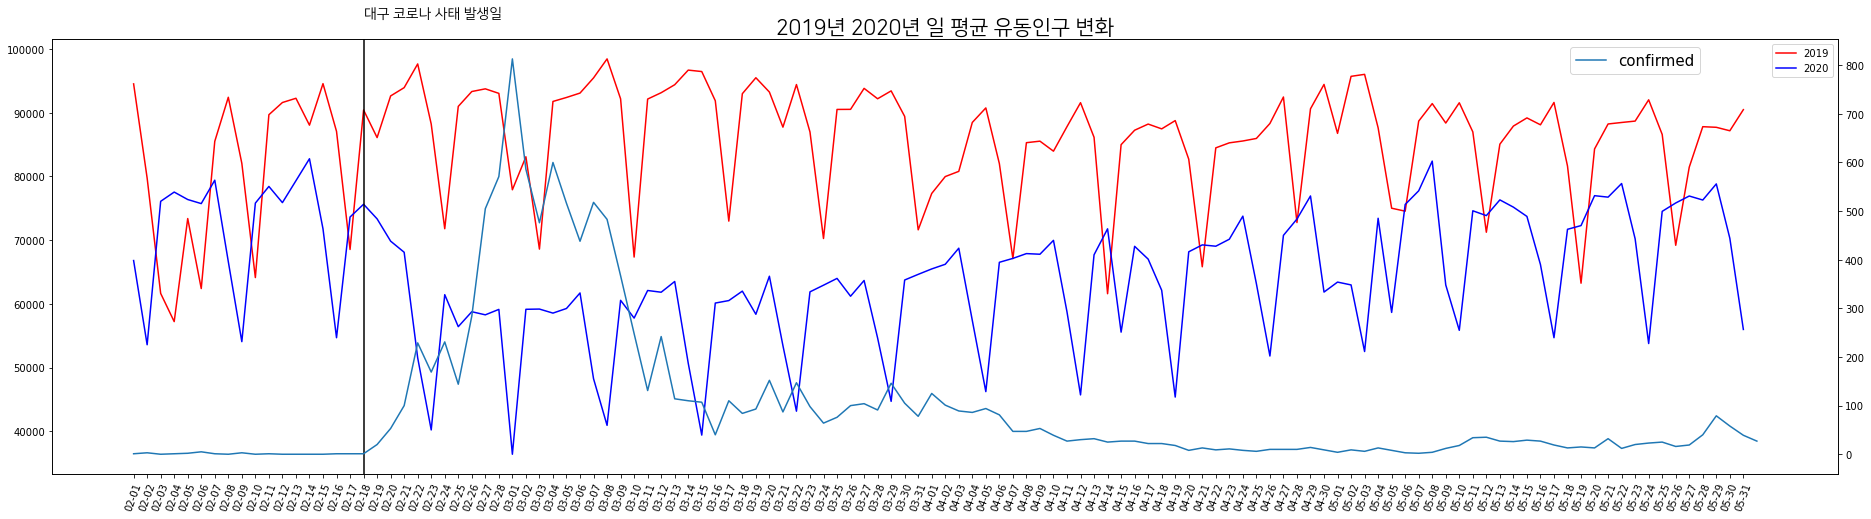

In [300]:
fig,ax=plt.subplots(figsize=(32,8))
sns.lineplot(data=mean_flow_2019.reset_index(drop=True),c='r',ax=ax,label='2019')
sns.lineplot(data=mean_flow_2020.reset_index(drop=True),c='b',ax=ax,label='2020')
ax2=ax.twinx()
sns.lineplot(data=corona[(corona.index>='2020-02')&(corona.index<'2020-06')].reset_index(drop=True),c='k',ax=ax2)
ax.axvline(17,c='k')
plt.text(17,900,'대구 코로나 사태 발생일',fontproperties=font,size=14,c='k')
# ax.set_xticklabels(np.arange(min(mean_flow_2020.index),max(mean_flow_2020.index),7))
plt.xticks(np.arange(0, 120, 1.0))
plt.title('2019년 2020년 일 평균 유동인구 변화',fontproperties=font,size=25,pad=15)
ax.set_xticklabels(labels=mean_flow_2020.index.astype(str).str[5:],rotation=70)
ax2.legend(loc=[0.85,0.92],fontsize=15)
plt.show()